In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("bitcoin_data.csv")

# Convertir la colonne 'date' en format datetime
df["date"] = pd.to_datetime(df["date"])

# Définir 'date' comme index
df.set_index("date", inplace=True)

# Supprimer les colonnes indésirables
df = df.drop(columns=["Unnamed: 0"])




In [2]:
# Charger les données (assurez-vous que df contient la colonne 'close' pour le prix)
data = df['close'].values.reshape(-1, 1)

# Normalisation des données
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Création des fenêtres pour LSTM (ex: utiliser les 7 jours précédents pour prédire le 8e jour)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Fenêtre temporelle
        y.append(data[i + time_step, 0])      # Valeur cible (prix du jour suivant)
    return np.array(X), np.array(y)

time_step = 7  # Utilisation des 7 jours précédents
X, y = create_dataset(data_scaled, time_step)

# Redimensionnement de X pour qu'il soit compatible avec LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Division des données en ensembles d'entraînement et de test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


# Construction du modèle LSTM
model = Sequential()

# Ajouter la première couche LSTM avec régularisation (Dropout)
model.add(LSTM(units=32, return_sequences=False, input_shape=(X_train.shape[1], 1)))
 # Dropout pour éviter le sur-apprentissage


# Couche de sortie
model.add(Dense(units=1))  # Une seule unité pour prédire le prix

# Compilation du modèle
model.compile(optimizer='adam', loss='mean_squared_error')

# Résumé du modèle
model.summary()


c:\Users\hajja\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - val_loss: 0.0064
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5068e-05 - val_loss: 0.0035
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8502e-05 - val_loss: 0.0022
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3142e-05 - val_loss: 0.0020
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9047e-05 - val_loss: 0.0017
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1398e-05 - val_loss: 0.0018
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.4073e-05 - val_loss: 0.0020
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.6648e-05 - val_loss: 0.0026
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.7550e-05 - val_loss: 0.0039
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8115e-05 - val_loss: 0.0029
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8722e-05 - val_loss: 0.0036
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━

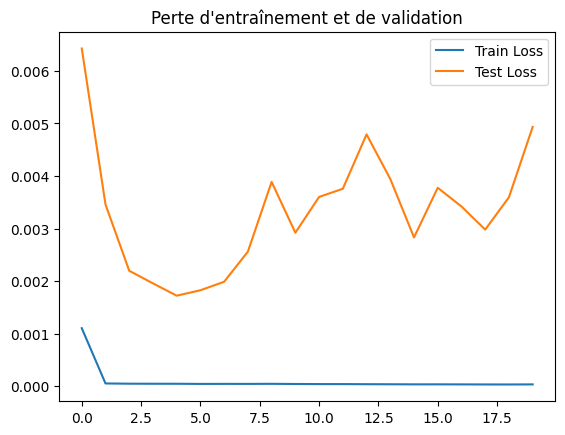

In [8]:
# Entraînement du modèle LSTM
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Visualisation de la perte (loss)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title("Perte d'entraînement et de validation")
plt.show()


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


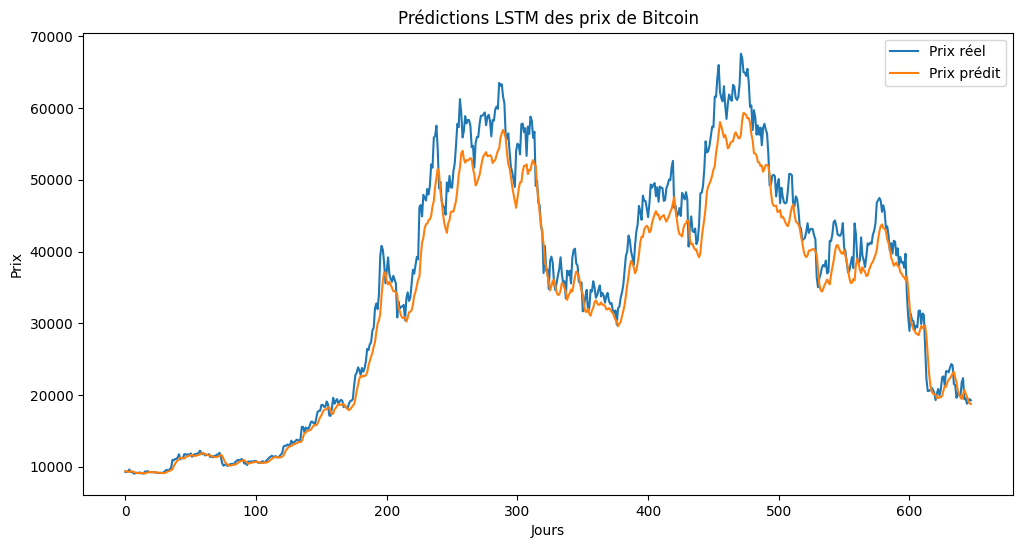

In [5]:
# Prédictions sur l'ensemble de test
predicted_prices = model.predict(X_test)

# Inverser la normalisation pour retrouver les valeurs originales
predicted_prices = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualiser les prédictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Prix réel')
plt.plot(predicted_prices, label='Prix prédit')
plt.title("Prédictions LSTM des prix de Bitcoin")
plt.xlabel("Jours")
plt.ylabel("Prix")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error
import math

# Calcul du MSE et RMSE
mse = mean_squared_error(y_test_actual, predicted_prices)
rmse = math.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 11810454.068746587
Root Mean Squared Error: 3436.634119126822
